In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from keras import models, layers
from keras.utils import image_dataset_from_directory, plot_model, to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

In [2]:
train_data = image_dataset_from_directory('./boots', label_mode = 'categorical', validation_split=0.2, subset="training", seed=1337, image_size=(136, 102))

Found 15000 files belonging to 3 classes.
Using 12000 files for training.


In [3]:
test_data = image_dataset_from_directory('./boots', label_mode = 'categorical', validation_split=0.2, subset="validation", seed=1337, image_size=(136, 102), batch_size=32)

Found 15000 files belonging to 3 classes.
Using 3000 files for validation.


In [4]:
network = models.Sequential([
layers.Rescaling(1./255, input_shape=(136,102, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(3, activation='softmax')  
])

network.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 136, 102, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 136, 102, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 68, 51, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 51, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 25, 64)        1

In [5]:
cp_callback = ModelCheckpoint(filepath='./ckpts',save_weights_only=True,verbose=1)

In [6]:
network.fit(train_data, epochs=64, batch_size=32, validation_data=test_data, callbacks=[cp_callback])

Epoch 1/64
375/375 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.8851
Epoch 1: saving model to .\ckpts
375/375 [==============================] - 52s 137ms/step - loss: 0.2997 - accuracy: 0.8851 - val_loss: 0.1639 - val_accuracy: 0.9387
Epoch 2/64
375/375 [==============================] - ETA: 0s - loss: 0.1409 - accuracy: 0.9521
Epoch 2: saving model to .\ckpts
375/375 [==============================] - 51s 136ms/step - loss: 0.1409 - accuracy: 0.9521 - val_loss: 0.1388 - val_accuracy: 0.9493
Epoch 3/64
375/375 [==============================] - ETA: 0s - loss: 0.0832 - accuracy: 0.9723
Epoch 3: saving model to .\ckpts
375/375 [==============================] - 50s 134ms/step - loss: 0.0832 - accuracy: 0.9723 - val_loss: 0.1228 - val_accuracy: 0.9563
Epoch 4/64
375/375 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9810
Epoch 4: saving model to .\ckpts
375/375 [==============================] - 50s 133ms/step - loss: 0.0554 - accurac

Epoch 32/64
375/375 [==============================] - ETA: 0s - loss: 2.3176e-06 - accuracy: 1.0000
Epoch 32: saving model to .\ckpts
375/375 [==============================] - 61s 161ms/step - loss: 2.3176e-06 - accuracy: 1.0000 - val_loss: 0.1153 - val_accuracy: 0.9807
Epoch 33/64
375/375 [==============================] - ETA: 0s - loss: 1.8958e-06 - accuracy: 1.0000
Epoch 33: saving model to .\ckpts
375/375 [==============================] - 60s 160ms/step - loss: 1.8958e-06 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 0.9810
Epoch 34/64
375/375 [==============================] - ETA: 0s - loss: 1.5484e-06 - accuracy: 1.0000
Epoch 34: saving model to .\ckpts
375/375 [==============================] - 60s 159ms/step - loss: 1.5484e-06 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9810
Epoch 35/64
375/375 [==============================] - ETA: 0s - loss: 1.2687e-06 - accuracy: 1.0000
Epoch 35: saving model to .\ckpts
375/375 [==============================] - 61s

375/375 [==============================] - ETA: 0s - loss: 6.8247e-09 - accuracy: 1.0000
Epoch 62: saving model to .\ckpts
375/375 [==============================] - 68s 181ms/step - loss: 6.8247e-09 - accuracy: 1.0000 - val_loss: 0.1588 - val_accuracy: 0.9800
Epoch 63/64
375/375 [==============================] - ETA: 0s - loss: 5.8114e-09 - accuracy: 1.0000
Epoch 63: saving model to .\ckpts
375/375 [==============================] - 69s 184ms/step - loss: 5.8114e-09 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9800
Epoch 64/64
375/375 [==============================] - ETA: 0s - loss: 4.9074e-09 - accuracy: 1.0000
Epoch 64: saving model to .\ckpts
375/375 [==============================] - 71s 190ms/step - loss: 4.9074e-09 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9803


In [7]:
network.save('boots_model')

INFO:tensorflow:Assets written to: boots_model\assets


INFO:tensorflow:Assets written to: boots_model\assets


1/1 [==============================] - 0s 19ms/step


'Boot'

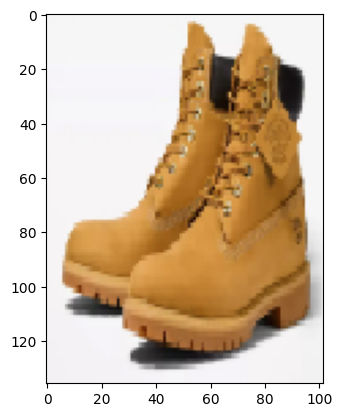

In [44]:
img = tf.keras.utils.load_img('boot_test.png', target_size=(136, 102))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img = tf.expand_dims(img, 0)
predictions = network.predict(img)
score = tf.nn.softmax(predictions[0])
test_data.class_names[np.argmax(score)]

1/1 [==============================] - 0s 20ms/step


'Shoe'

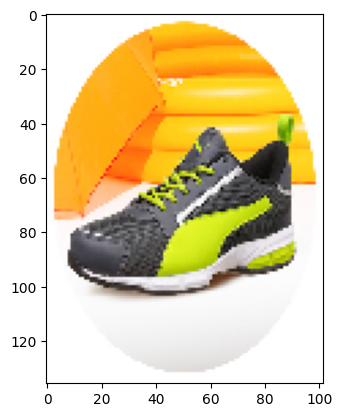

In [45]:
img = tf.keras.utils.load_img('shoe_test.jpg', target_size=(136, 102))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img = tf.expand_dims(img, 0)
predictions = network.predict(img)
score = tf.nn.softmax(predictions[0])
test_data.class_names[np.argmax(score)]

1/1 [==============================] - 0s 18ms/step


'Sandal'

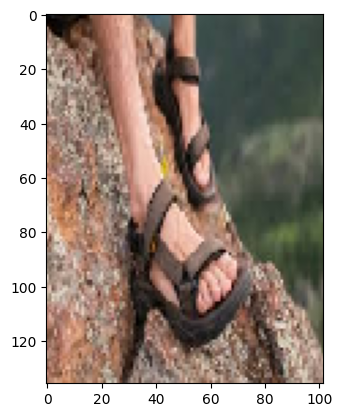

In [46]:
img = tf.keras.utils.load_img('sandal_test.jfif', target_size=(136, 102))
plt.imshow(img)
img = tf.keras.utils.img_to_array(img)
img = tf.expand_dims(img, 0)
predictions = network.predict(img)
score = tf.nn.softmax(predictions[0])
test_data.class_names[np.argmax(score)]